In [2]:
import os
import pathlib
from typing import List, Tuple
from dotenv import load_dotenv
from setup_logger import logger

BASE_DIR = pathlib.Path(__name__).resolve().parent.parent
load_dotenv(BASE_DIR / '.env')
DATA_PATH = pathlib.Path(os.getenv("DATA_PATH"))

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import matplotlib.colors as colors
from typing import List, Tuple

## Generate plot data

In [4]:
generated_plots_savepath = DATA_PATH / "generated_plots"

In [5]:
colors_list = list(colors._colors_full_map.values())[:1150]
marker_types = [".", "o", "v", "^", "<", ">", "1", "s", "p", "P", "*", "+", "X", "D", "d"]
marker_sizes = [60, 70, 80, 90, 100, 110]

distributions = [
    sps.uniform(loc=1, scale=8), 
    sps.expon(loc=0, scale=1.5), 
    sps.norm(loc=5, scale=1)
]

In [6]:
def generate_points(n: int, distributions: List):
    distr_x, distr_y = np.random.choice(distributions, size=2)
    x = distr_x.rvs(size=n)
    y = distr_y.rvs(size=n)
    
    return x, y

In [7]:
def generate_single_plot():
    fig = plt.figure(figsize=(8, 8))

    markersize = np.random.choice(marker_sizes)
    all_points = []

    for j in range(2):
        x, y = generate_points(40, distributions)
        points_single_marker = np.stack((x, y)).T

        color = np.random.choice(colors_list)
        marker = np.random.choice(marker_types)
        plt.scatter(x, y,
                    s=markersize,
                    c=color,
                    marker=marker,
                    cmap=None,
                    edgecolors='black',
                    linewidths=0.6,
                    label=f"Label {j}")
        all_points.append(points_single_marker)
    plt.title("Title")
    plt.xlabel("X label")
    plt.ylabel("Y label")
    plt.grid()
    plt.legend()

    return fig, all_points

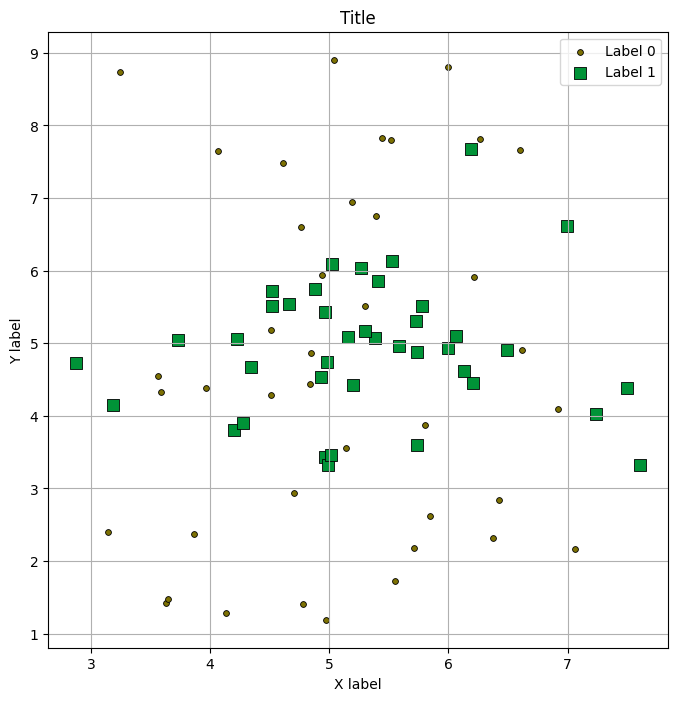

In [8]:
fig, all_points = generate_single_plot()

**Generate many plots**

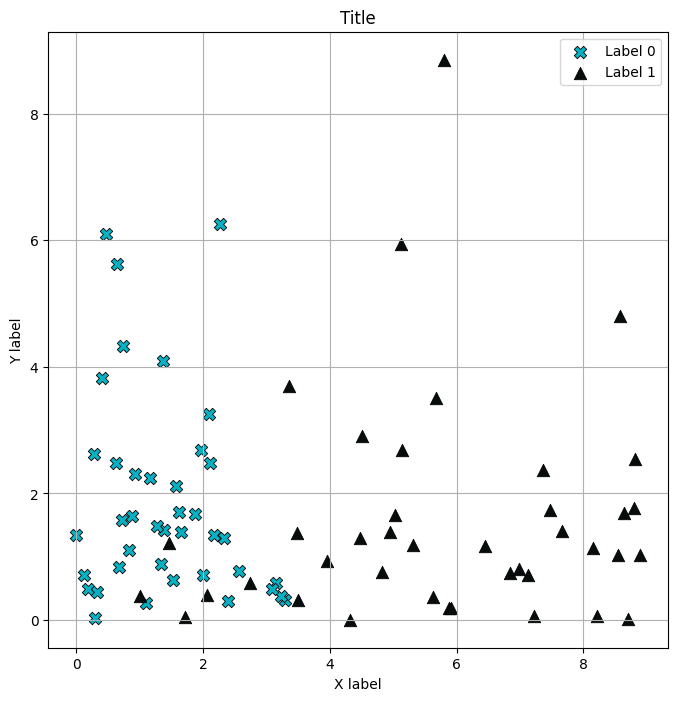

In [10]:
for i in range(1):
    fig, all_points = generate_single_plot()

    for marker_num in range(len(all_points)):
        marker_points = all_points[marker_num]

        np.savetxt(
            generated_plots_savepath / f"plot_{i}_coordinates_marker_{marker_num}.csv",
            marker_points,
            delimiter=",")
    fig.savefig(generated_plots_savepath / f"plot_{i}.png")

## Read generated points coordinates

In [15]:
points = np.loadtxt(
    generated_plots_savepath / "plot_0_coordinates_marker_1.csv", 
    dtype=np.float64, 
    delimiter=","
)

(-1.0, 10.0)

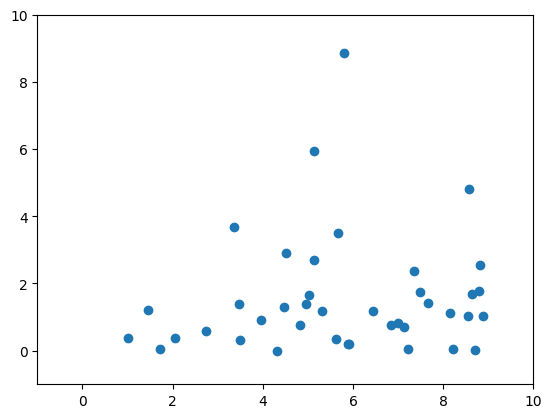

In [16]:
plt.scatter(points[:, 0], points[:, 1])
plt.xlim(-1, 10)
plt.ylim(-1, 10)